In [2]:
from utils.data_loader import DataLoader
from utils.data_analyzer import DataAnalyzer
from utils.classifier_evaluator import ClassifierEvaluator
import pandas as pd

In [3]:
loader = DataLoader()
loader.load_csv('data/schizophrenia_dataset.csv')
loader.watch_data_head()

2025-02-26 15:12:27,756 - INFO - Данные успешно загружены из файла: data/schizophrenia_dataset.csv
2025-02-26 15:12:27,760 - INFO - Первые 5 строк данных:
   Hasta_ID  Yaş  Cinsiyet  Eğitim_Seviyesi  Medeni_Durum  Meslek  \
0         1   72         1                4             2       0   
1         2   49         1                5             2       2   
2         3   53         1                5             3       2   
3         4   67         1                3             2       0   
4         5   54         0                1             2       0   

   Gelir_Düzeyi  Yaşadığı_Yer  Tanı  Hastalık_Süresi  Hastaneye_Yatış_Sayısı  \
0             2             1     0                0                       0   
1             1             0     1               35                       1   
2             1             0     1               32                       0   
3             2             0     0                0                       0   
4             2             1 

In [4]:
loader.data.rename(columns={
    'Hasta_ID': 'Id',
    'Yaş': 'Age',
    'Cinsiyet': 'Gender',
    'Eğitim_Seviyesi': 'Education_Level',
    'Medeni_Durum': 'Martial_Statuts',
    'Meslek': 'Occupation',
    'Gelir_Düzeyi': 'Income_level',
    'Yaşadığı_Yer': 'Live_Area',
    'Tanı': 'Diagnosis',
    'Hastalık_Süresi': 'Disease_Duration',
    'Hastaneye_Yatış_Sayısı': 'Hospitalizations',
    'Ailede_Şizofreni_Öyküsü': 'Family_History',
    'Madde_Kullanımı': 'Substance_Use',
    'İntihar_Girişimi': 'Suicide_Attempts',
    'Pozitif_Semptom_Skoru': 'Positive_Symptoms_Score',
    'Negatif_Semptom_Skoru': 'Negative_Symptoms_Score',
    'GAF_Skoru': 'Global_Assessment_of_Functioning_Score',
    'Sosyal_Destek': 'Social_Support',
    'Stres_Faktörleri': 'Stress_Factors',
    'İlaç_Uyumu': 'Adherence_to_Medication'
}, inplace=True)

loader.watch_data_head()

2025-02-26 15:12:27,767 - INFO - Первые 5 строк данных:
   Id  Age  Gender  Education_Level  Martial_Statuts  Occupation  \
0   1   72       1                4                2           0   
1   2   49       1                5                2           2   
2   3   53       1                5                3           2   
3   4   67       1                3                2           0   
4   5   54       0                1                2           0   

   Income_level  Live_Area  Diagnosis  Disease_Duration  Hospitalizations  \
0             2          1          0                 0                 0   
1             1          0          1                35                 1   
2             1          0          1                32                 0   
3             2          0          0                 0                 0   
4             2          1          0                 0                 0   

   Family_History  Substance_Use  Suicide_Attempts  Positive_Symptoms_Sc

In [5]:
loader.count_missing_values()

2025-02-26 15:12:28,002 - INFO - Количество пропущенных значений в каждом столбце:
2025-02-26 15:12:28,003 - INFO - 
Id                                        0
Age                                       0
Gender                                    0
Education_Level                           0
Martial_Statuts                           0
Occupation                                0
Income_level                              0
Live_Area                                 0
Diagnosis                                 0
Disease_Duration                          0
Hospitalizations                          0
Family_History                            0
Substance_Use                             0
Suicide_Attempts                          0
Positive_Symptoms_Score                   0
Negative_Symptoms_Score                   0
Global_Assessment_of_Functioning_Score    0
Social_Support                            0
Stress_Factors                            0
Adherence_to_Medication                   0
dty

In [6]:
analyzer = DataAnalyzer(loader.data)
analyzer.dataset_head_info()

2025-02-26 15:12:28,181 - INFO - Размер датасета: (10000, 20)
2025-02-26 15:12:28,183 - INFO - Типы данных в каждом столбце:
Id                                        int64
Age                                       int64
Gender                                    int64
Education_Level                           int64
Martial_Statuts                           int64
Occupation                                int64
Income_level                              int64
Live_Area                                 int64
Diagnosis                                 int64
Disease_Duration                          int64
Hospitalizations                          int64
Family_History                            int64
Substance_Use                             int64
Suicide_Attempts                          int64
Positive_Symptoms_Score                   int64
Negative_Symptoms_Score                   int64
Global_Assessment_of_Functioning_Score    int64
Social_Support                            int64
Stress_Fact

In [7]:
analyzer.statistical_summary()

2025-02-26 15:12:28,424 - INFO - Основные статистики для числовых столбцов:
                Id           Age        Gender  Education_Level  \
count  10000.00000  10000.000000  10000.000000     10000.000000   
mean    5000.50000     48.867700      0.502600         3.042600   
std     2886.89568     18.215054      0.500018         1.423021   
min        1.00000     18.000000      0.000000         1.000000   
25%     2500.75000     33.000000      0.000000         2.000000   
50%     5000.50000     49.000000      1.000000         3.000000   
75%     7500.25000     65.000000      1.000000         4.000000   
max    10000.00000     80.000000      1.000000         5.000000   

       Martial_Statuts    Occupation  Income_level     Live_Area  \
count     10000.000000  10000.000000  10000.000000  10000.000000   
mean          1.518200      1.510600      0.996900      0.499400   
std           1.117315      1.114097      0.817531      0.500025   
min           0.000000      0.000000      0.0000

In [8]:
loader.data.drop(columns=['Id', 'Disease_Duration', 'Hospitalizations'], inplace=True)

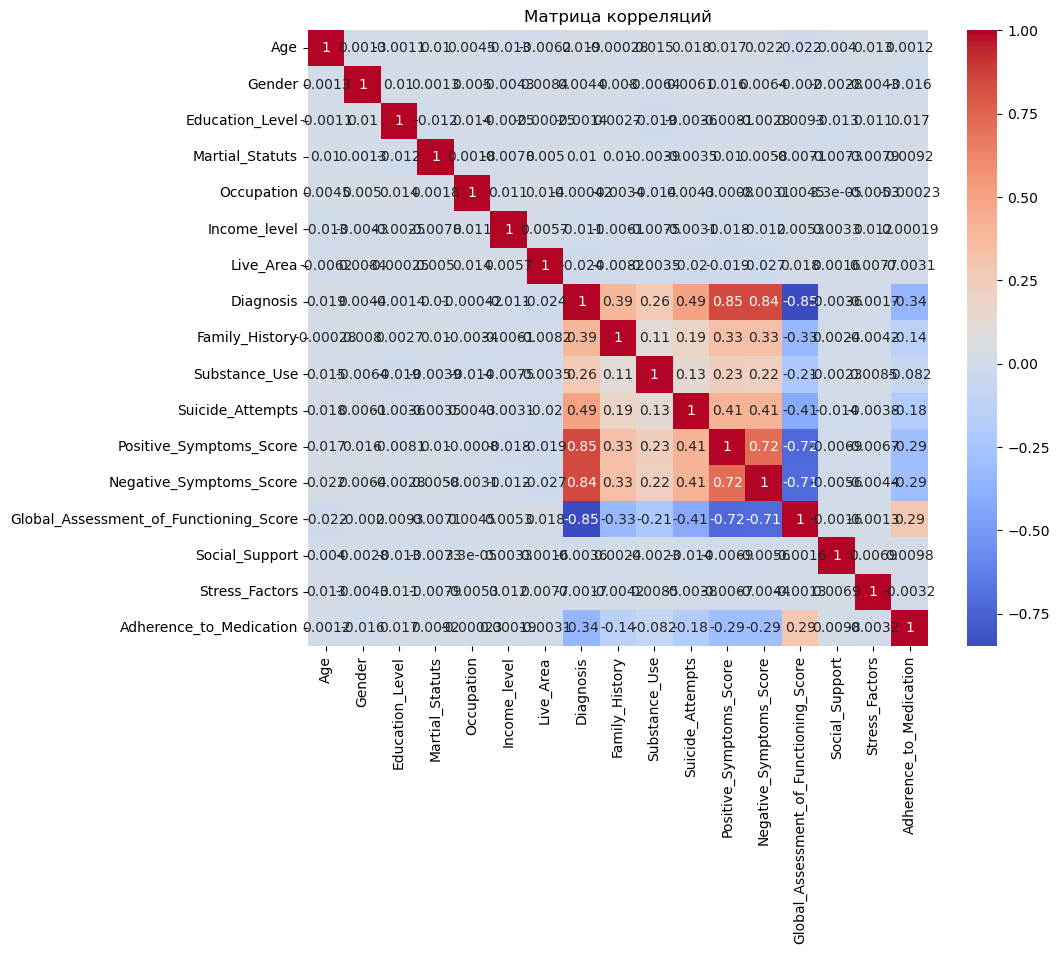

In [9]:
analyzer = DataAnalyzer(loader.data)
analyzer.correlation_analysis()

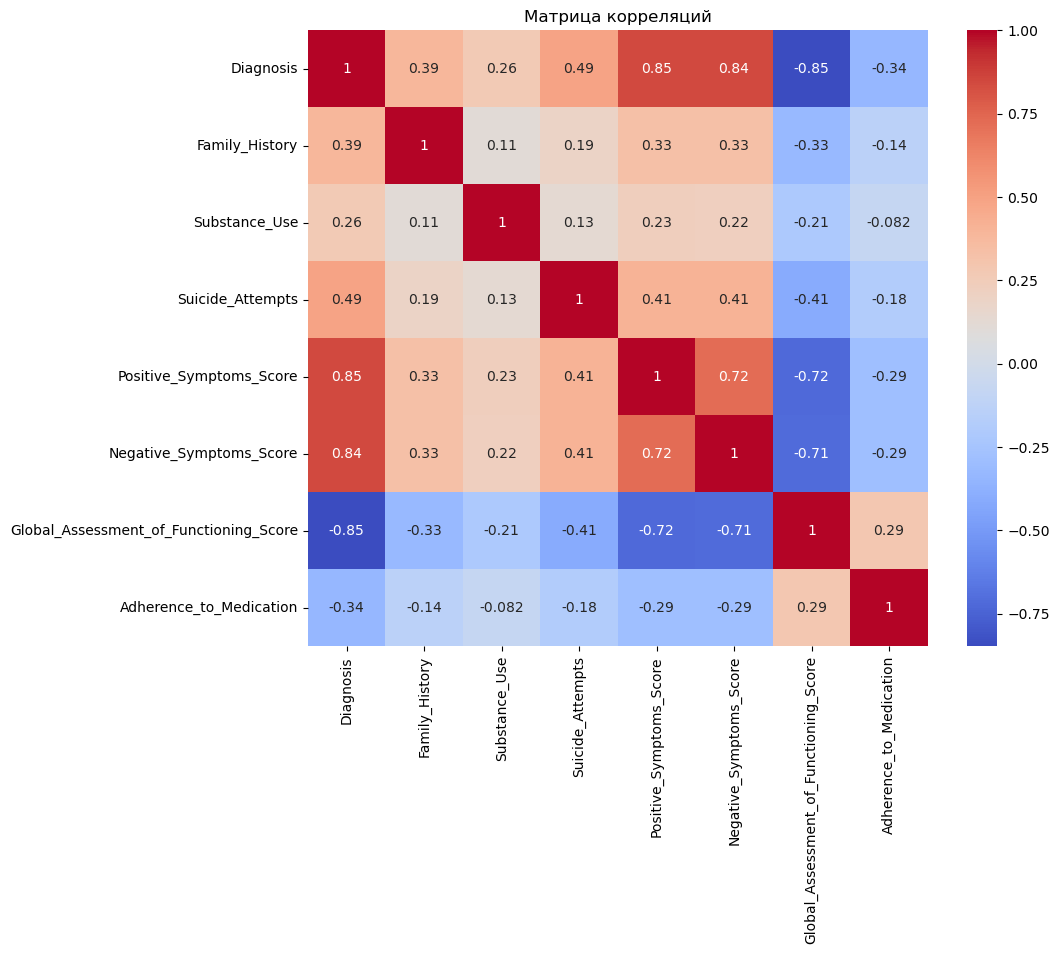

In [10]:
loader.data.drop(columns=['Stress_Factors', 'Social_Support', 'Gender', 'Martial_Statuts', 'Occupation', 'Live_Area', 'Age', 'Education_Level', 'Income_level'], inplace=True)
analyzer = DataAnalyzer(loader.data)
analyzer.correlation_analysis()

In [11]:
analyzer.detect_outliers()

2025-02-26 15:12:31,454 - INFO - Количество выбросов в каждом столбце:
Diagnosis                                   0
Family_History                              0
Substance_Use                               0
Suicide_Attempts                          884
Positive_Symptoms_Score                     0
Negative_Symptoms_Score                     0
Global_Assessment_of_Functioning_Score      0
Adherence_to_Medication                     0
dtype: int64


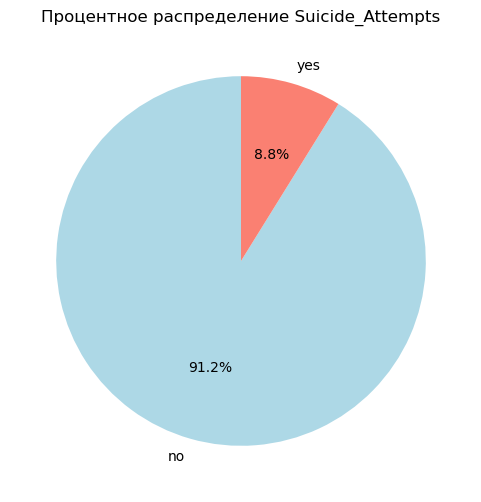

In [12]:
import matplotlib.pyplot as plt

# Подсчитаем количество уникальных значений
counts = loader.data['Suicide_Attempts'].value_counts()

# Метки для диаграммы
labels = ['no', 'yes']

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(
    counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Формат отображения процентов
    startangle=90,      # Начальный угол
    colors=['lightblue', 'salmon']  # Цвета для категорий
)
plt.title('Процентное распределение Suicide_Attempts')
plt.show()

In [13]:
X = loader.data.drop('Diagnosis', axis=1)
y = loader.data['Diagnosis']

evaluator = ClassifierEvaluator(X, y)

2025-02-26 15:12:35,122 - INFO - Начало оценки переданных классификаторов...
2025-02-26 15:12:35,123 - INFO - Оценка классификатора: Gradient Boosting


Результаты для классификатора Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


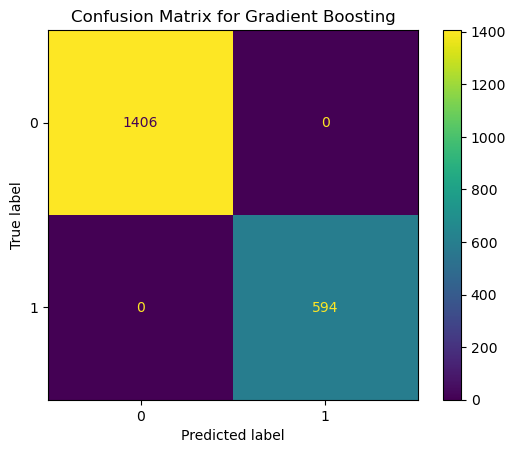

2025-02-26 15:12:35,352 - INFO - Gradient Boosting - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:35,352 - INFO - Оценка классификатора: CatBoost


Результаты для классификатора CatBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


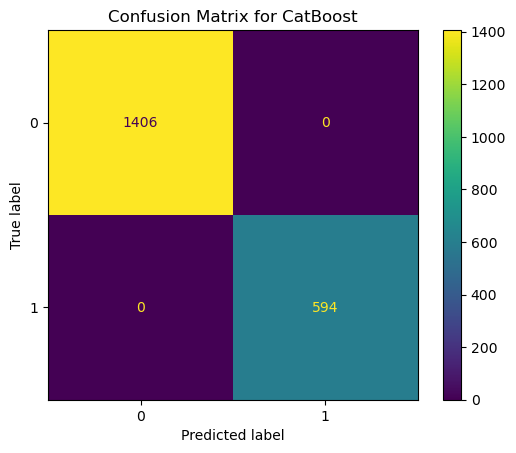

2025-02-26 15:12:36,903 - INFO - CatBoost - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:36,903 - INFO - Оценка классификатора: AdaBoost


Результаты для классификатора AdaBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


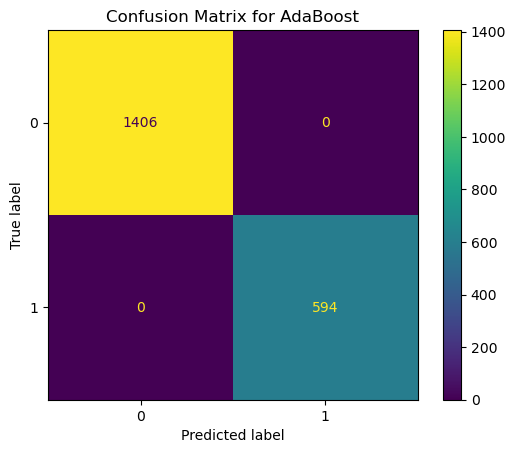

2025-02-26 15:12:36,974 - INFO - AdaBoost - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:36,975 - INFO - Оценка классификатора: Extra Trees


Результаты для классификатора Extra Trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


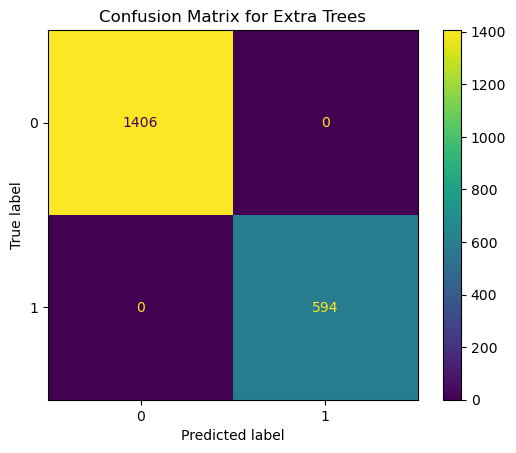

2025-02-26 15:12:37,155 - INFO - Extra Trees - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:37,155 - INFO - Оценка классификатора: Quadratic Discriminant Analysis
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Результаты для классификатора Quadratic Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1406
           1       0.84      0.56      0.67       594

    accuracy                           0.84      2000
   macro avg       0.84      0.76      0.78      2000
weighted avg       0.84      0.84      0.83      2000

Accuracy: 83.65%


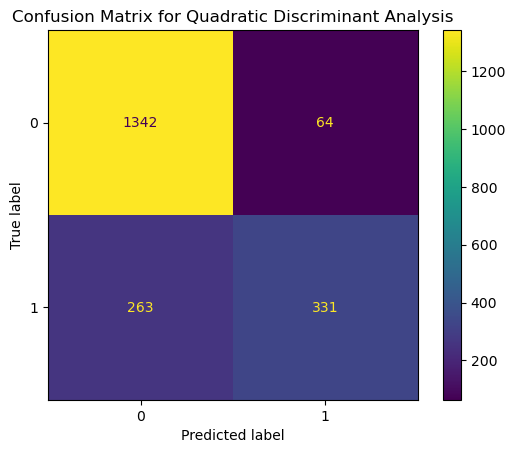

2025-02-26 15:12:37,286 - INFO - Quadratic Discriminant Analysis - Accuracy: 0.8365, F1: 0.8255, Precision: 0.8367, Recall: 0.8365
2025-02-26 15:12:37,286 - INFO - Оценка классификатора: LightGBM


[LightGBM] [Info] Number of positive: 2293, number of negative: 5707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286625 -> initscore=-0.911832
[LightGBM] [Info] Start training from score -0.911832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

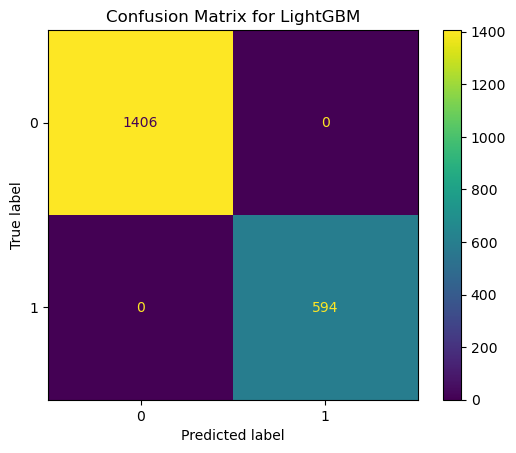

2025-02-26 15:12:37,429 - INFO - LightGBM - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:37,429 - INFO - Оценка классификатора: K Neighbors


Результаты для классификатора K Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


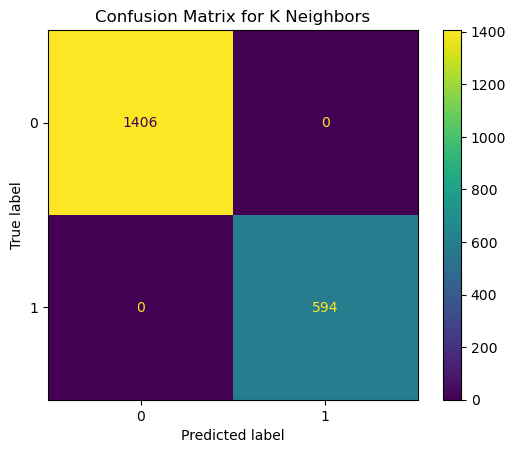

2025-02-26 15:12:37,558 - INFO - K Neighbors - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:37,558 - INFO - Оценка классификатора: Decision Tree


Результаты для классификатора Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


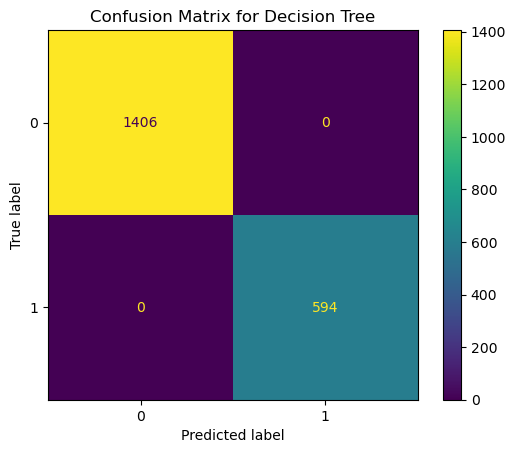

2025-02-26 15:12:37,626 - INFO - Decision Tree - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:37,627 - INFO - Оценка классификатора: XGBoost


Результаты для классификатора XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


/home/yana/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:12:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


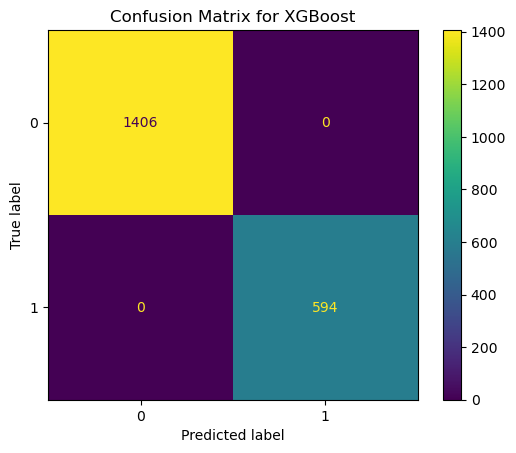

2025-02-26 15:12:37,735 - INFO - XGBoost - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:37,735 - INFO - Оценка классификатора: Dummy
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with n

Результаты для классификатора Dummy:
              precision    recall  f1-score   support

           0       0.70      1.00      0.83      1406
           1       0.00      0.00      0.00       594

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000

Accuracy: 70.30%


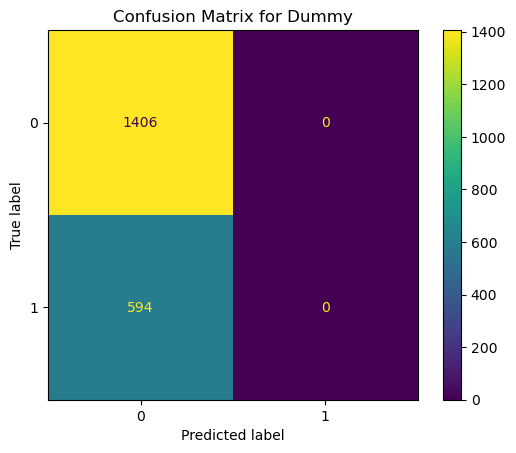

2025-02-26 15:12:37,822 - INFO - Dummy - Accuracy: 0.7030, F1: 0.5804, Precision: 0.4942, Recall: 0.7030
2025-02-26 15:12:37,822 - INFO - Оценка классификатора: SVM (Linear Kernel)


Результаты для классификатора SVM (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       594

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 100.00%


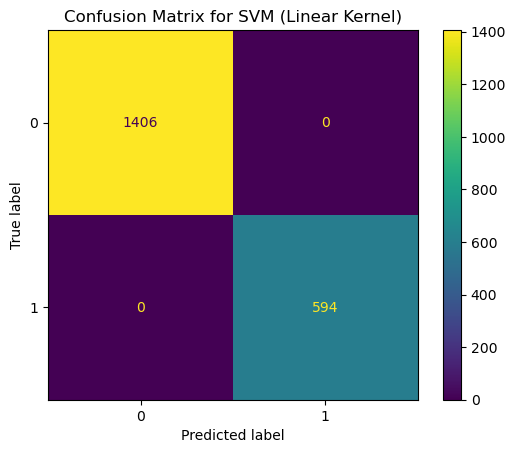

2025-02-26 15:12:37,894 - INFO - SVM (Linear Kernel) - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:37,895 - INFO - Оценка классификаторов завершена.


In [14]:
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Оценка отдельных классификаторов
classifiers = [
    ("Gradient Boosting", GradientBoostingClassifier()),                  # Классификатор градиентного бустинга
    ("CatBoost", CatBoostClassifier(verbose=0)),                         # Классификатор CatBoost
    ("AdaBoost", AdaBoostClassifier()),                                  # Классификатор Ada Boost
    ("Extra Trees", ExtraTreesClassifier()),                             # Классификатор Extra Trees
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()), # Квадратичный дискриминантный анализ
    ("LightGBM", LGBMClassifier()),                                      # Light Gradient Boosting Machine
    ("K Neighbors", KNeighborsClassifier()),                             # Классификатор K Neighbors
    ("Decision Tree", DecisionTreeClassifier()),                         # Классификатор дерева решений
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss")), # Экстремальный градиентный бустинг
    ("Dummy", DummyClassifier(strategy="most_frequent")),                # Фиктивный классификатор
    ("SVM (Linear Kernel)", SVC(kernel="linear"))                        # SVM с линейным ядром
]

evaluator.evaluate(classifiers)

2025-02-26 15:12:38,649 - INFO - Начало оценки переданных классификаторов...
2025-02-26 15:12:38,650 - INFO - Оценка классификатора: Voting (Soft)
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Результаты для классификатора Voting (Soft):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1406
           1       0.96      0.69      0.80       594

    accuracy                           0.90      2000
   macro avg       0.92      0.84      0.87      2000
weighted avg       0.91      0.90      0.89      2000

Accuracy: 89.90%


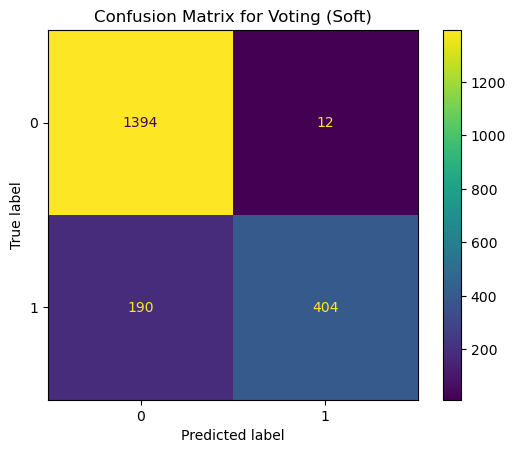

2025-02-26 15:12:40,111 - INFO - Voting (Soft) - Accuracy: 0.8990, F1: 0.8934, Precision: 0.9061, Recall: 0.8990
2025-02-26 15:12:40,111 - INFO - Оценка классификаторов завершена.


In [15]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier

# Оценка ансамбля Voting
voting = VotingClassifier(
    estimators=[
        ("Dummy", DummyClassifier(strategy="stratified")),
        ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
        ("CatBoost", CatBoostClassifier(verbose=0))
    ],
    voting="soft"
)
ensembles = [("Voting (Soft)", voting)]
evaluator.evaluate(ensembles)

2025-02-26 15:12:45,663 - INFO - Начало оценки переданных классификаторов...
2025-02-26 15:12:45,664 - INFO - Оценка классификатора: Stacking


[LightGBM] [Info] Number of positive: 2293, number of negative: 5707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286625 -> initscore=-0.911832
[LightGBM] [Info] Start training from score -0.911832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


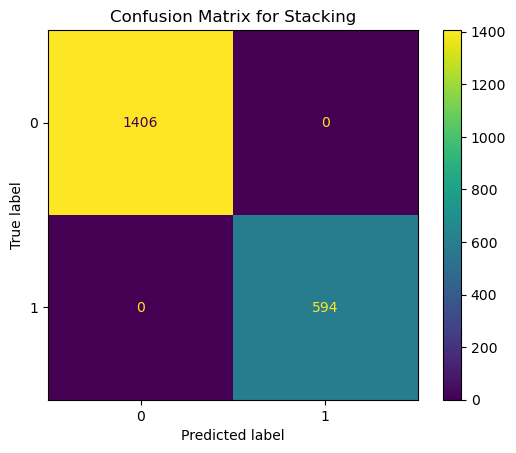

2025-02-26 15:12:54,082 - INFO - Stacking - Accuracy: 1.0000, F1: 1.0000, Precision: 1.0000, Recall: 1.0000
2025-02-26 15:12:54,082 - INFO - Оценка классификаторов завершена.


In [16]:
# Пример: Оценка ансамбля Stacking
stacking = StackingClassifier(
    estimators=[
        ("Dummy", DummyClassifier(strategy="stratified")),
        ("LightGBM", LGBMClassifier()),
        ("CatBoost", CatBoostClassifier(verbose=0))
    ],
    final_estimator=QuadraticDiscriminantAnalysis()
)
evaluator.evaluate([("Stacking", stacking)])


In [18]:
evaluator.get_best_classifier(metric="Accuracy")

2025-02-26 15:13:26,662 - INFO - Лучшие классификаторы по метрике Accuracy:
2025-02-26 15:13:26,665 - INFO - 
             Classifier  Accuracy  F1 Score  Precision  Recall
0     Gradient Boosting       1.0       1.0        1.0     1.0
1              CatBoost       1.0       1.0        1.0     1.0
2              AdaBoost       1.0       1.0        1.0     1.0
3           Extra Trees       1.0       1.0        1.0     1.0
5              LightGBM       1.0       1.0        1.0     1.0
6           K Neighbors       1.0       1.0        1.0     1.0
7         Decision Tree       1.0       1.0        1.0     1.0
8               XGBoost       1.0       1.0        1.0     1.0
10  SVM (Linear Kernel)       1.0       1.0        1.0     1.0
12             Stacking       1.0       1.0        1.0     1.0
